In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
stores = pd.read_csv("Data/stores.csv")
print(stores.shape)
stores.head()

(54, 5)


store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [3]:
test = pd.read_csv("Data/test.csv")
print(test.shape)
test.head()

(28512, 5)


id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [4]:
stores = pd.read_csv("Data/stores.csv")
train = pd.read_csv("Data/train.csv")
print(train.shape)
# train["Time"] = np.arange(len(train.index))
train.head()

(3000888, 6)


id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

C:\kaggle_competitions\store_sales\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


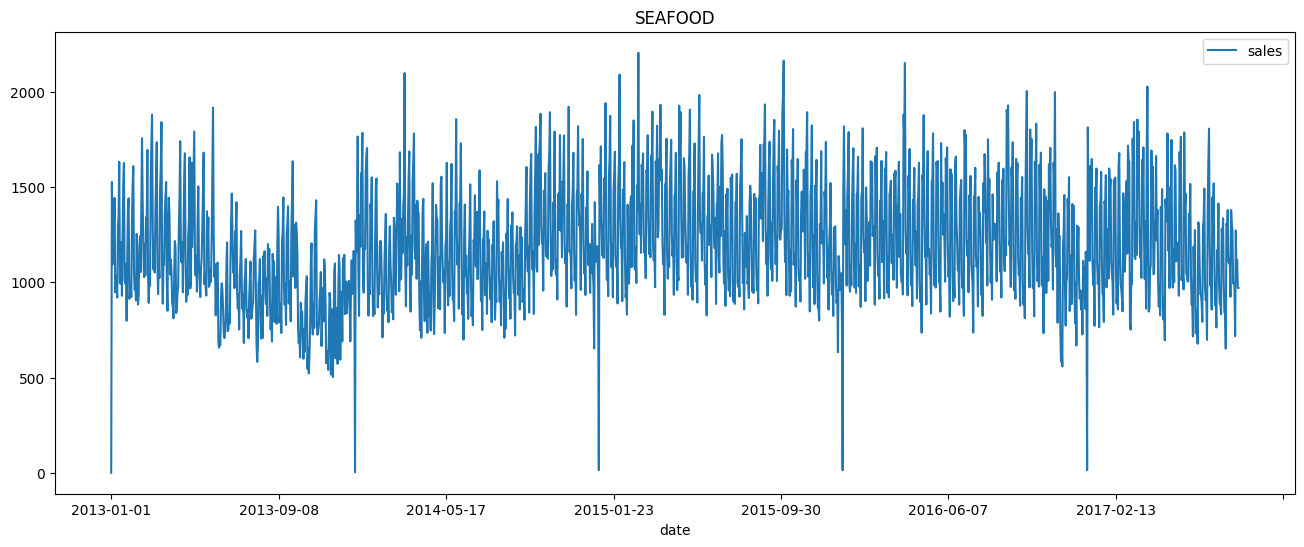

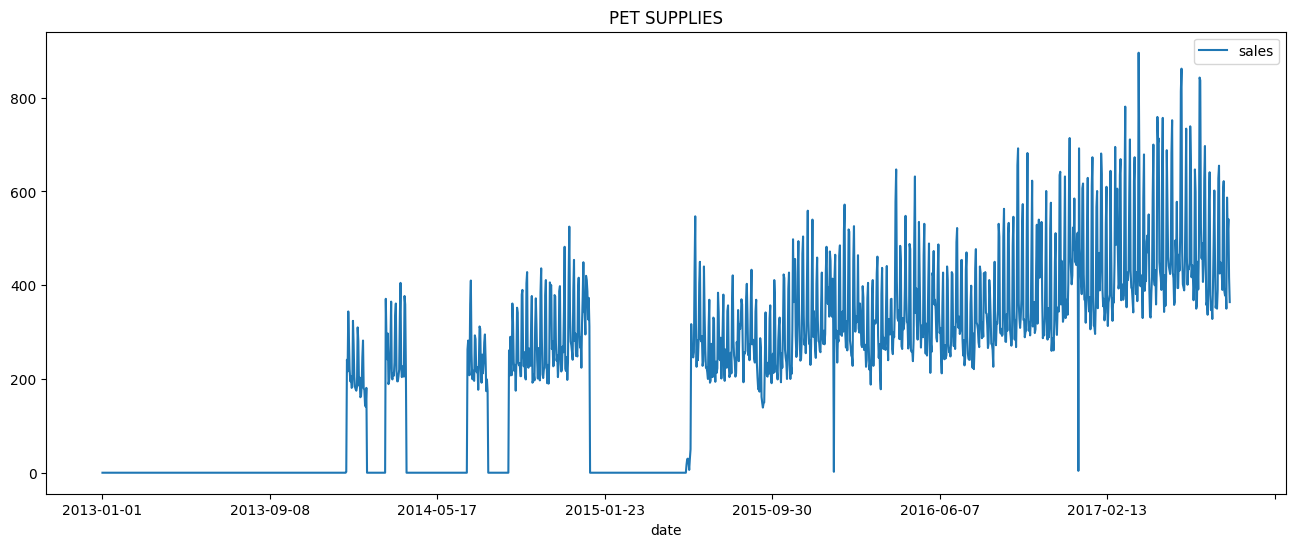

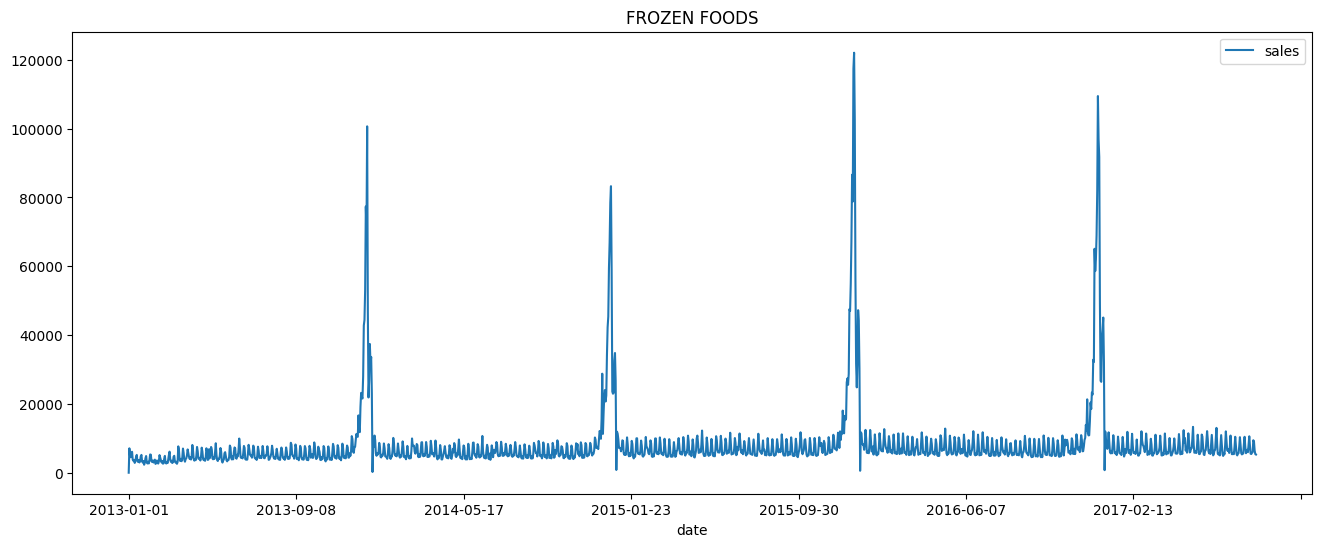

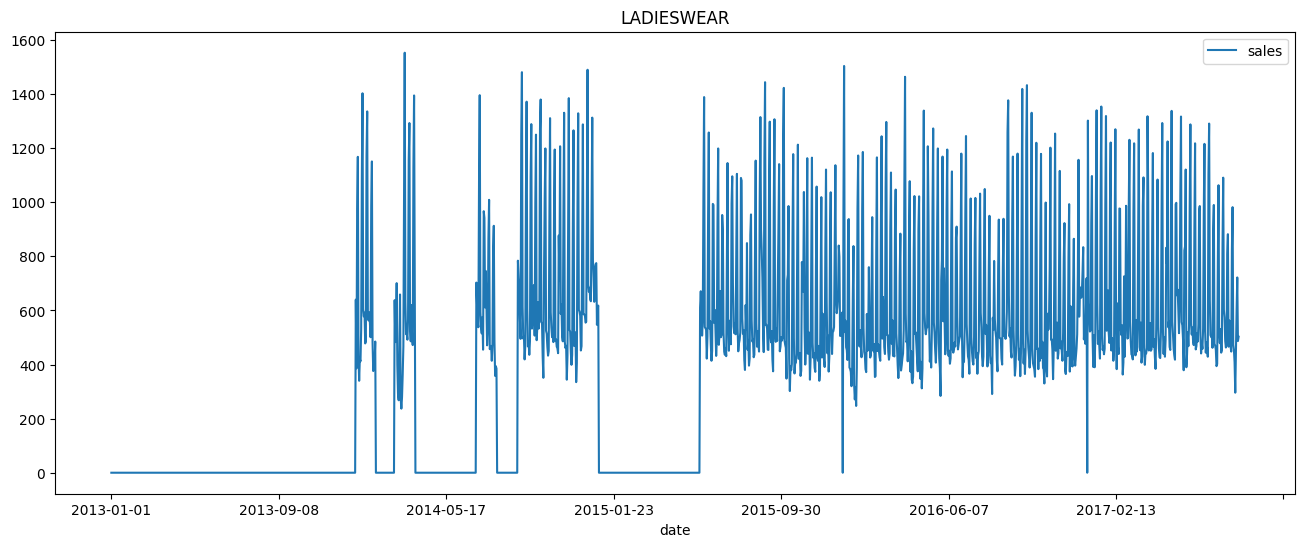

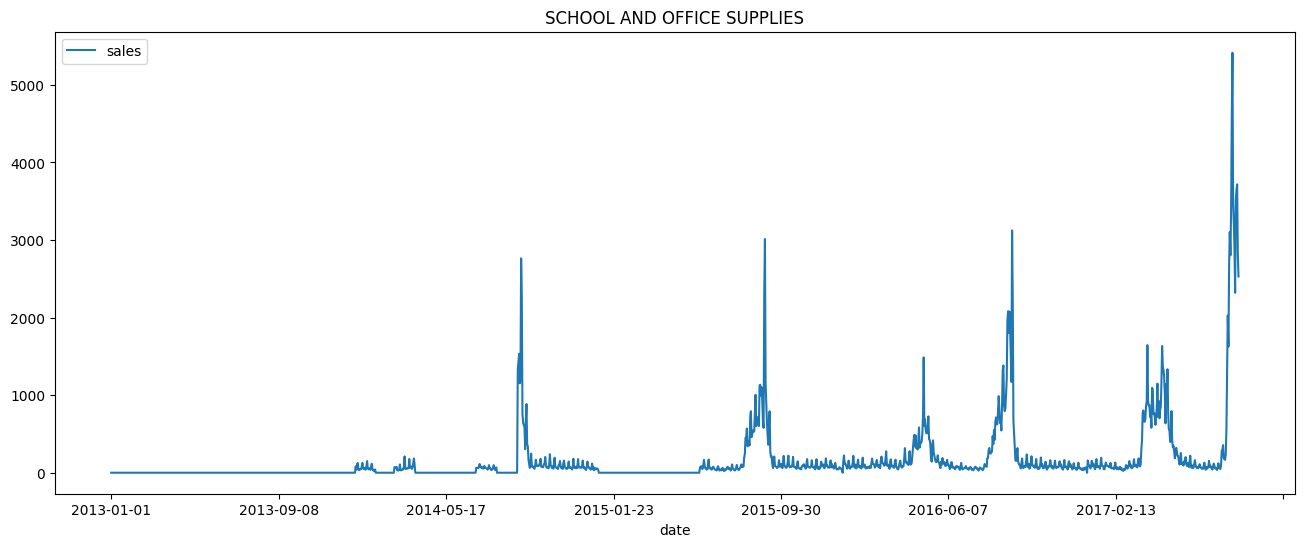

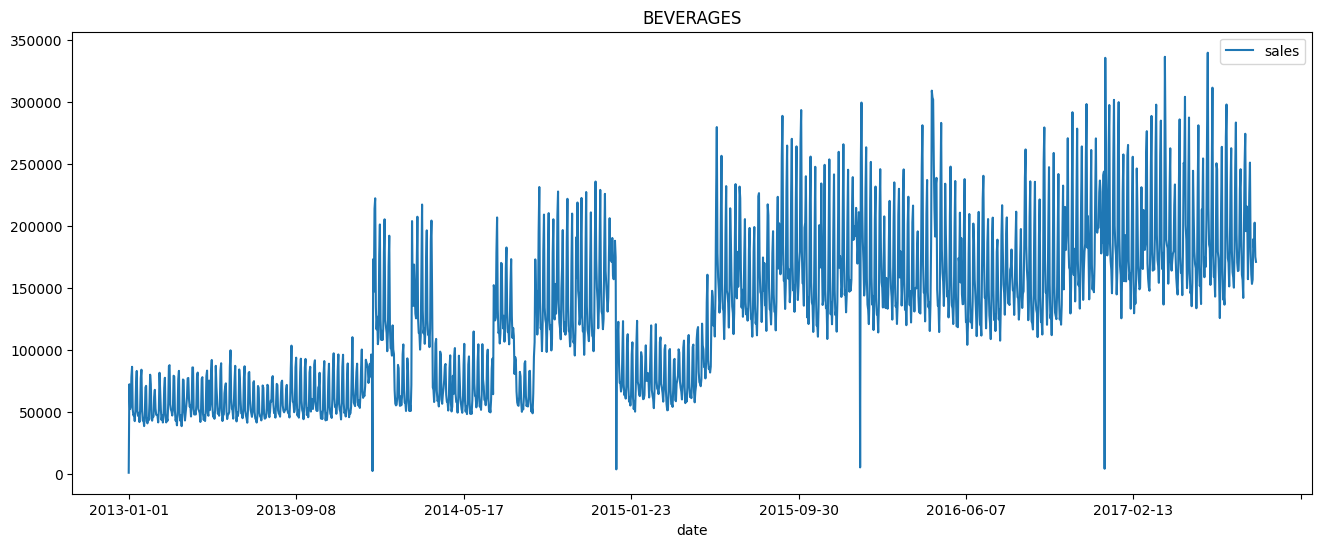

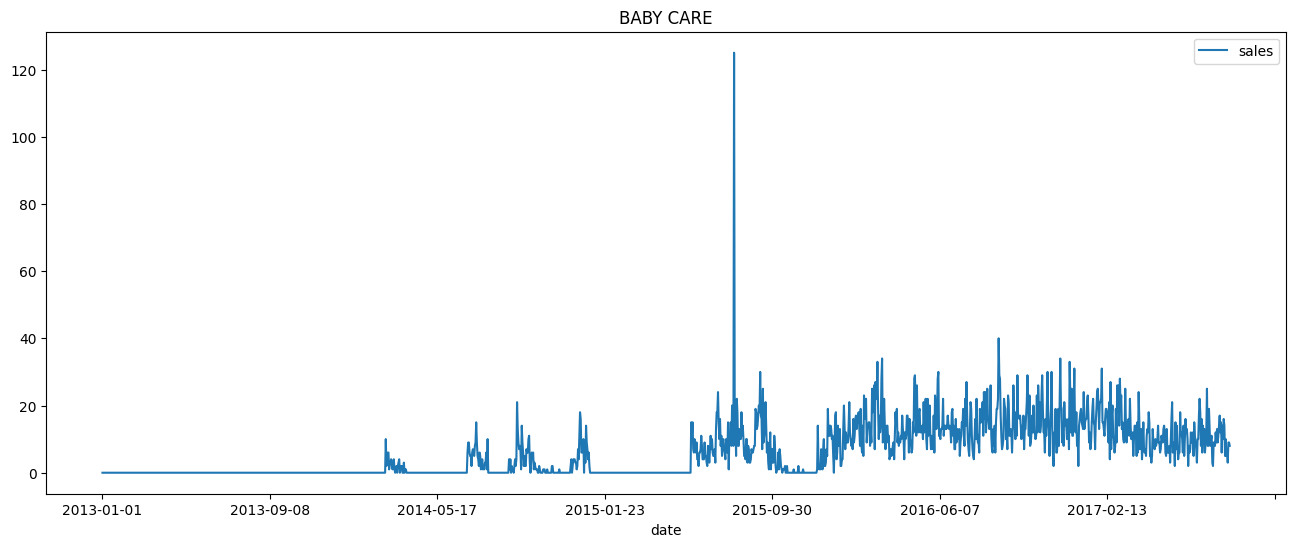

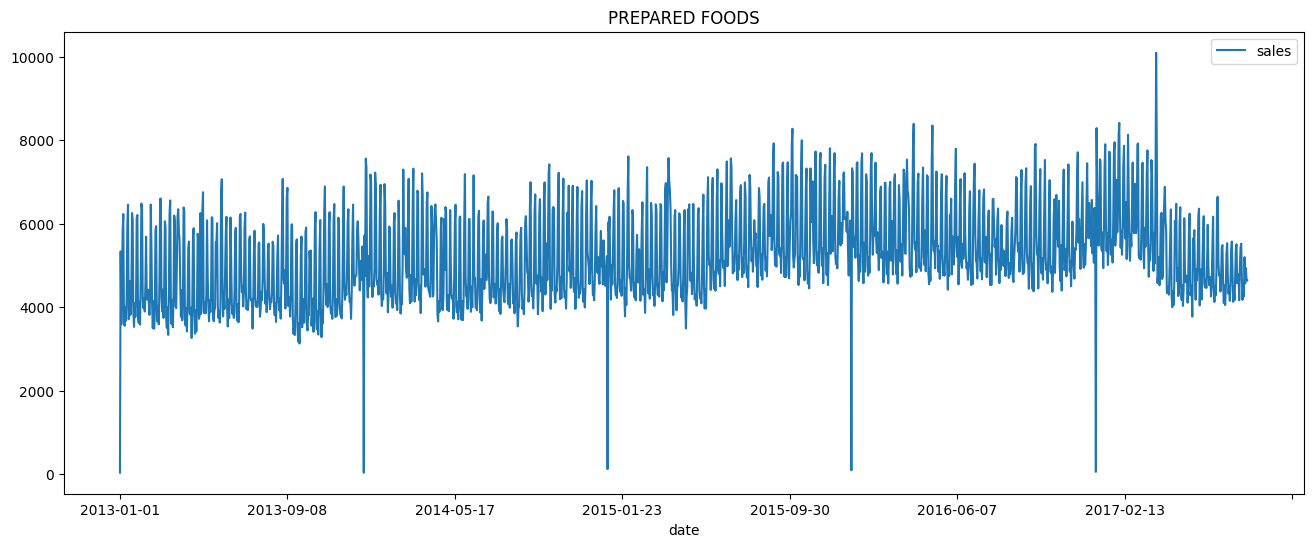

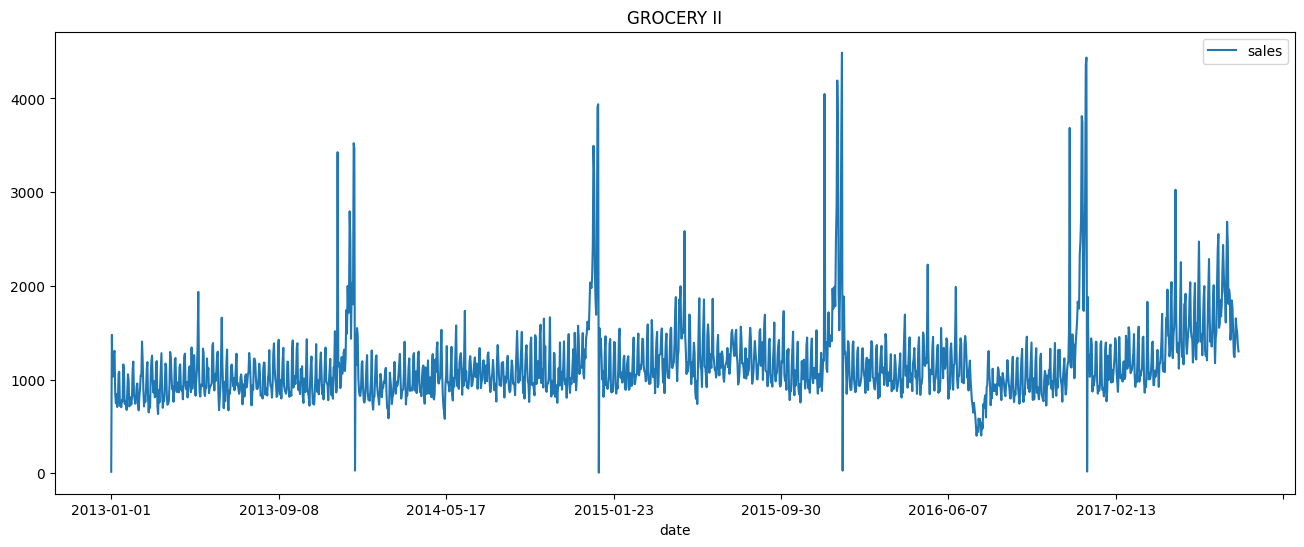

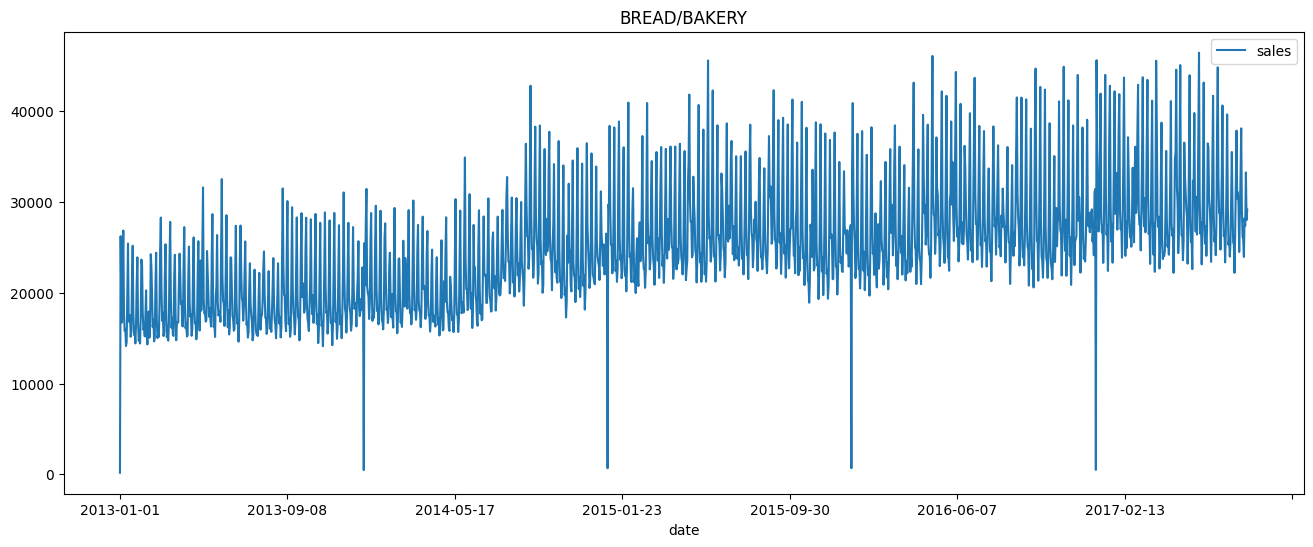

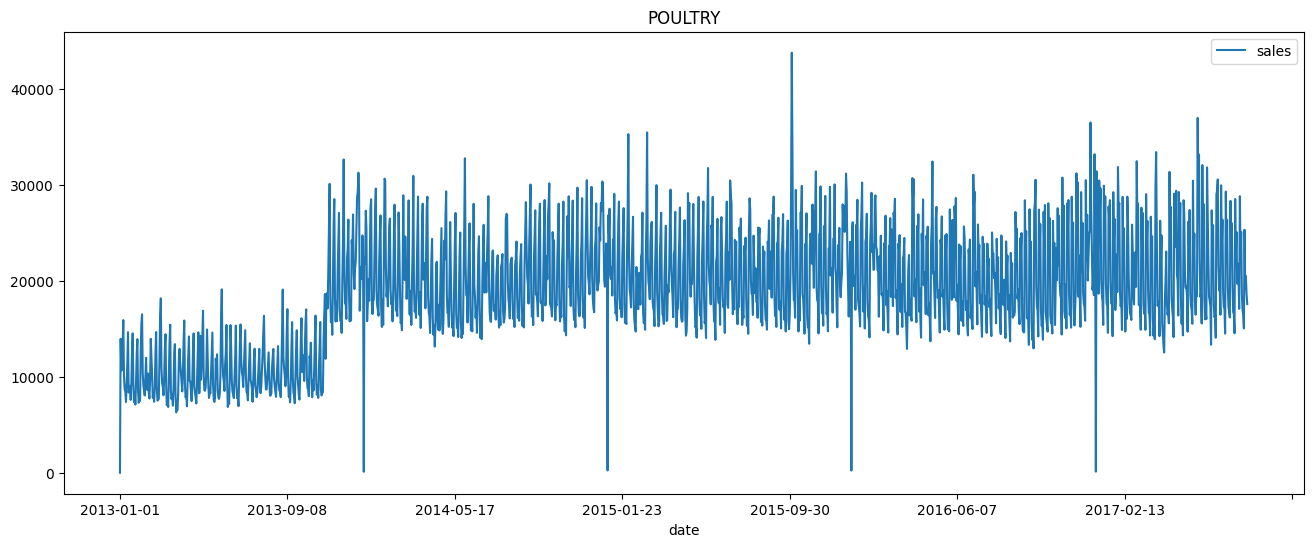

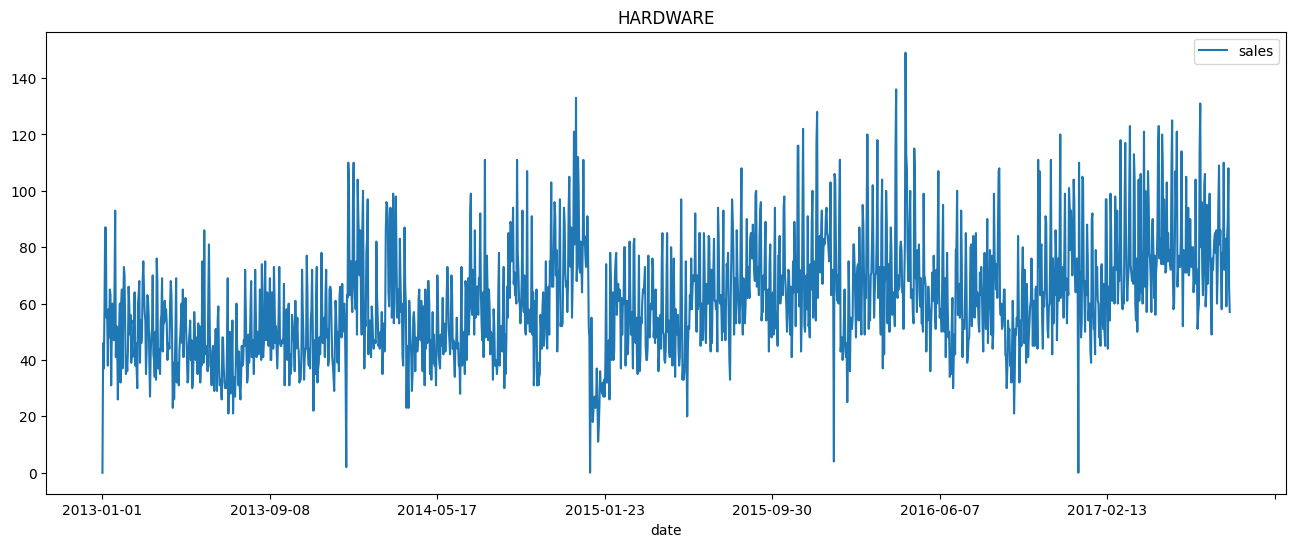

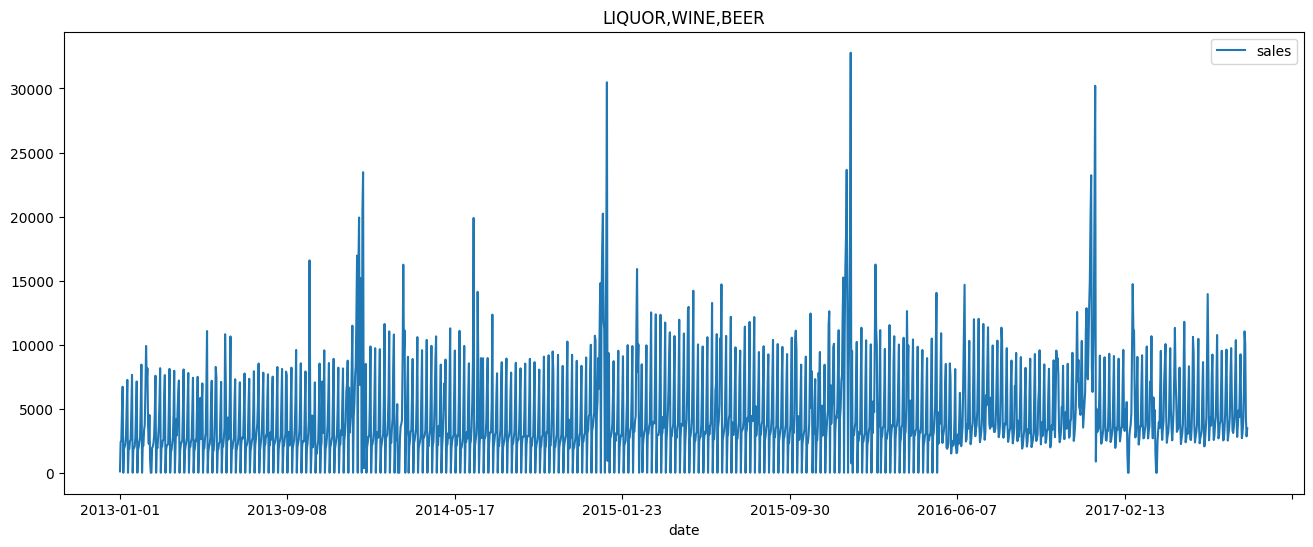

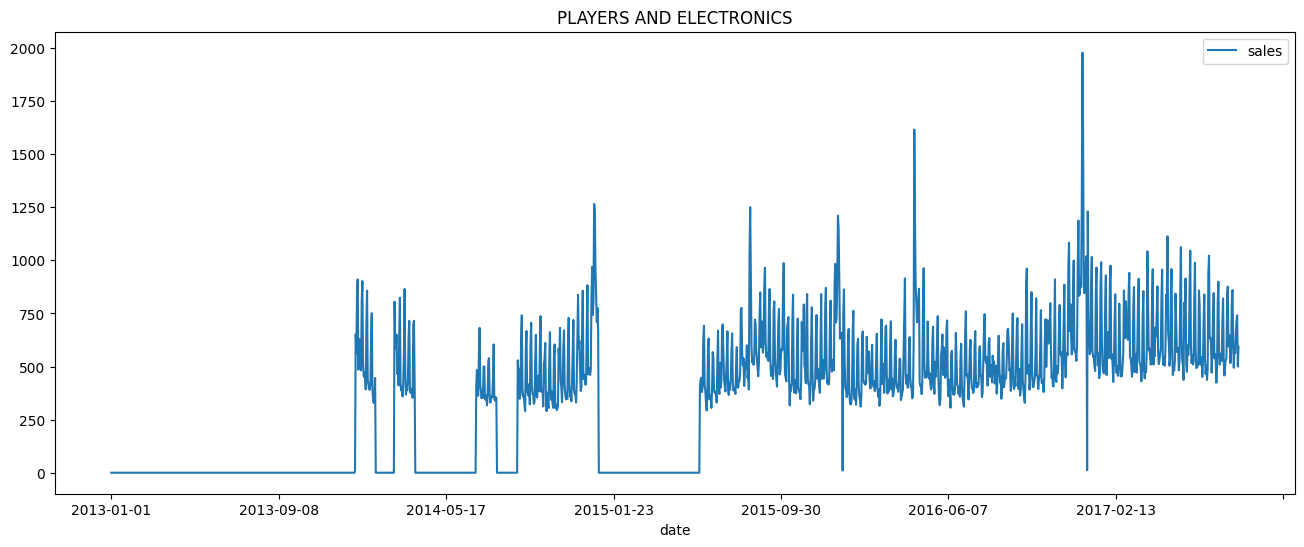

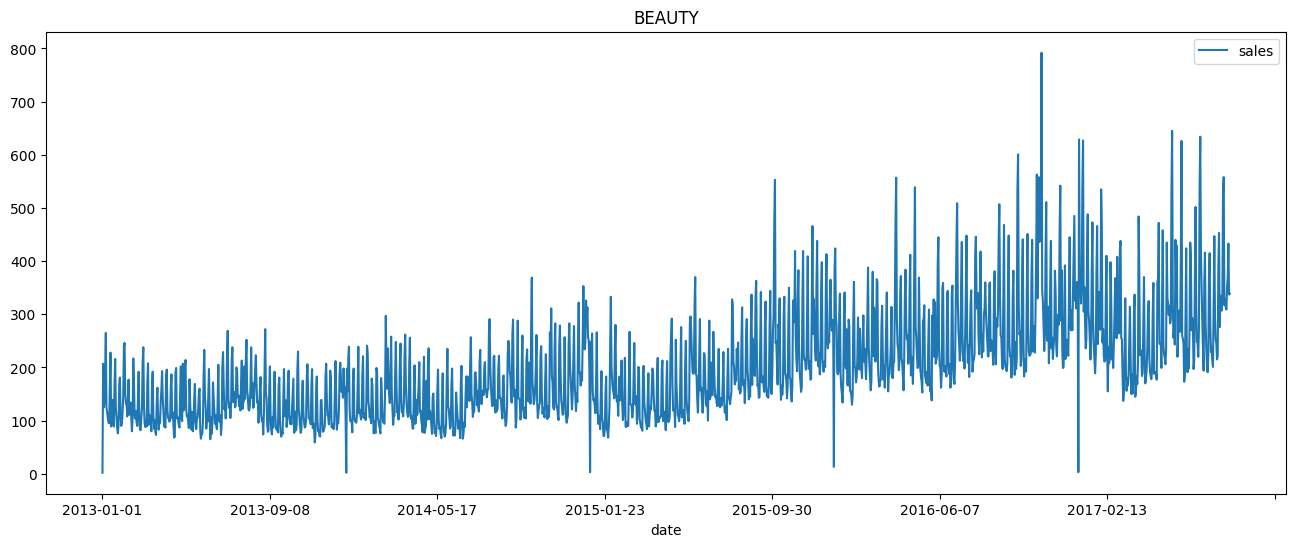

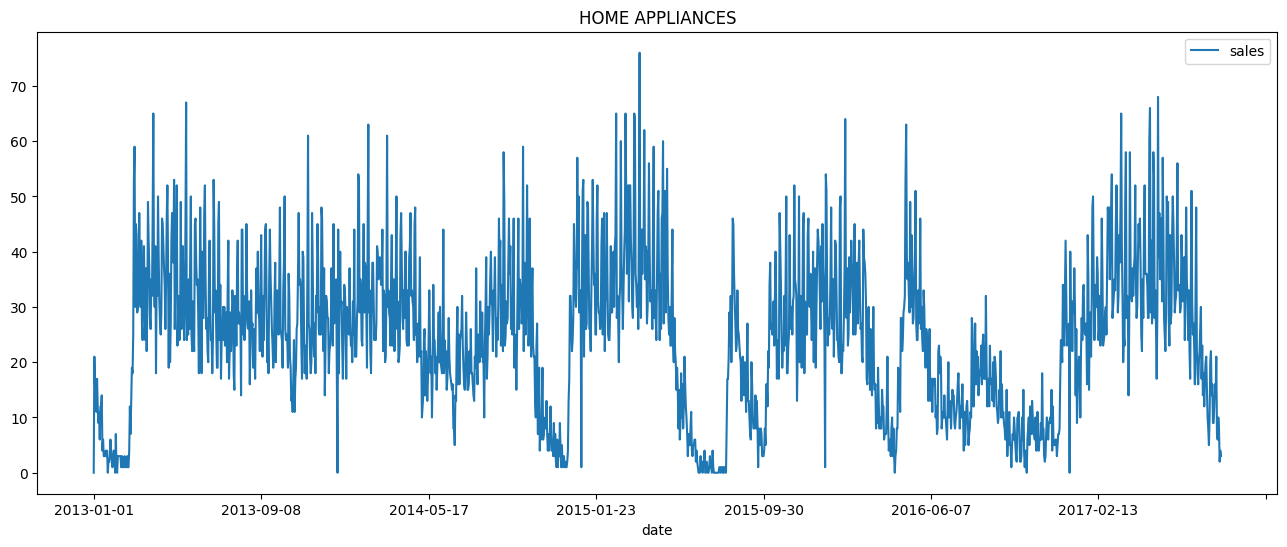

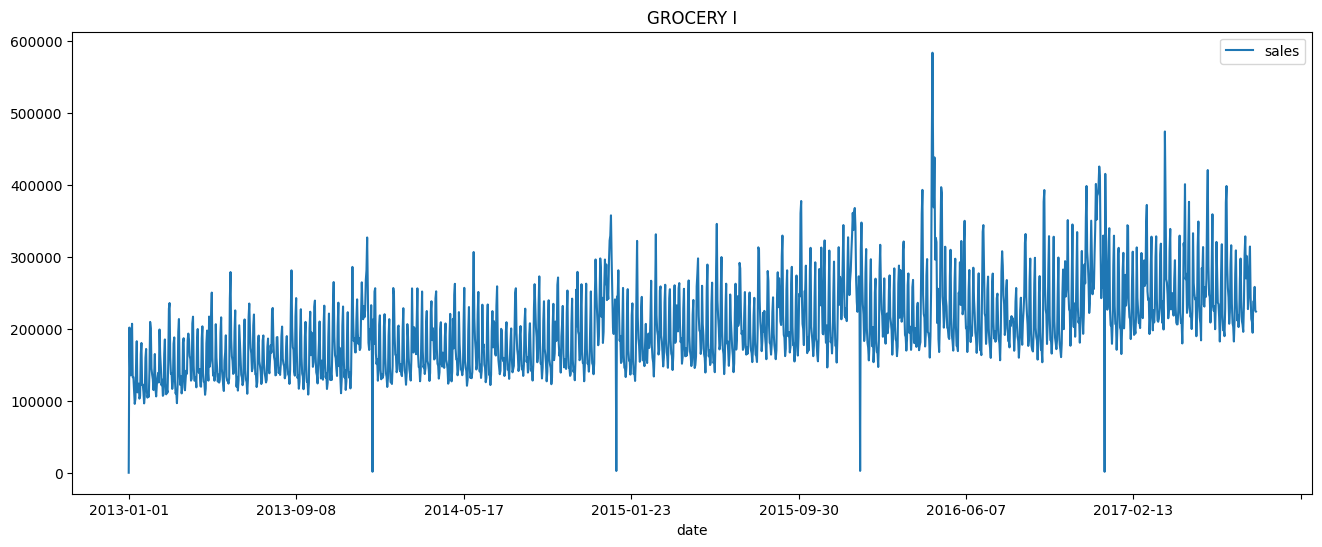

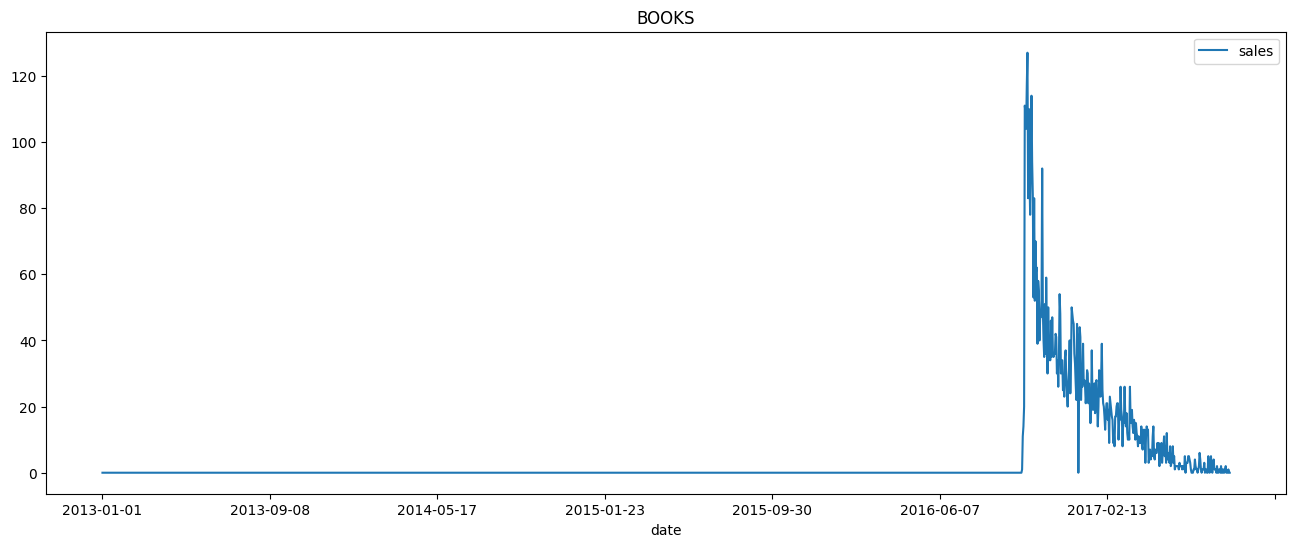

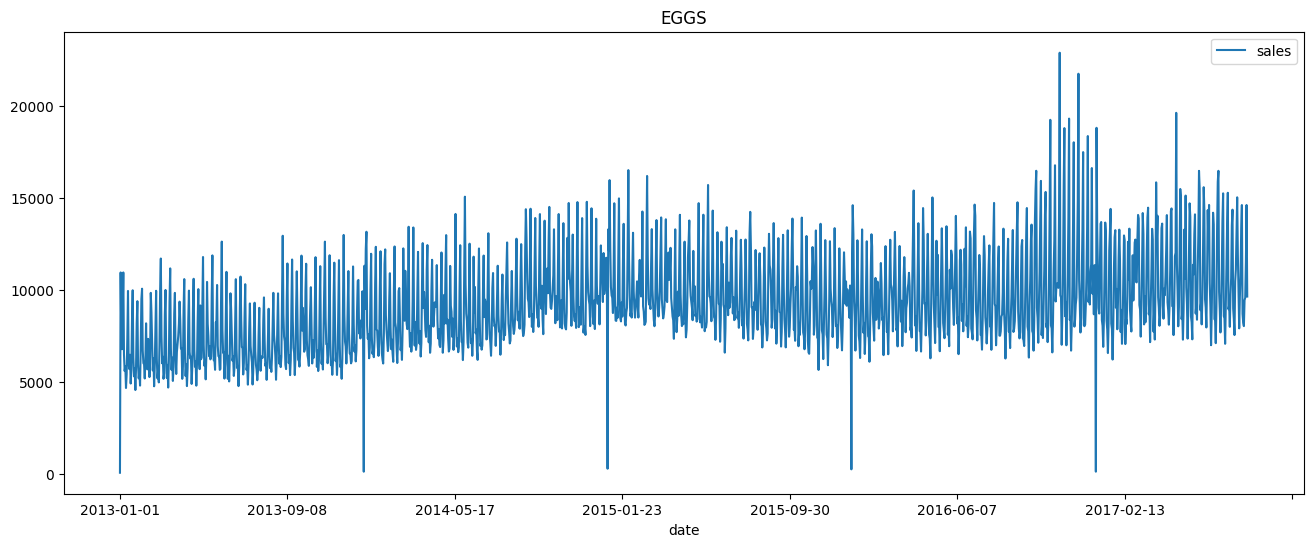

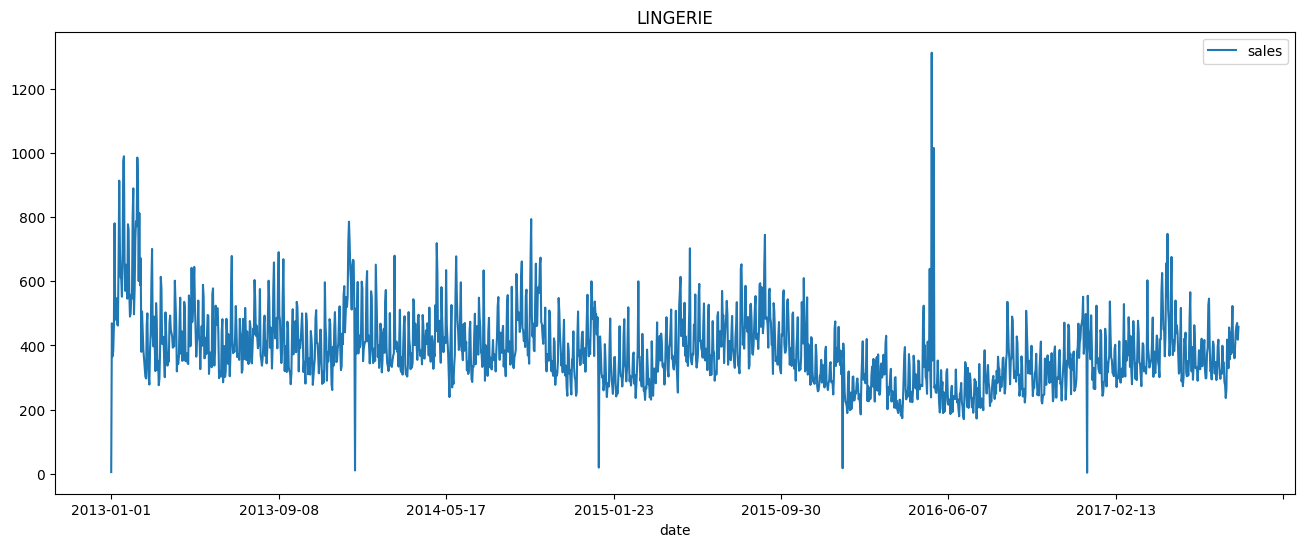

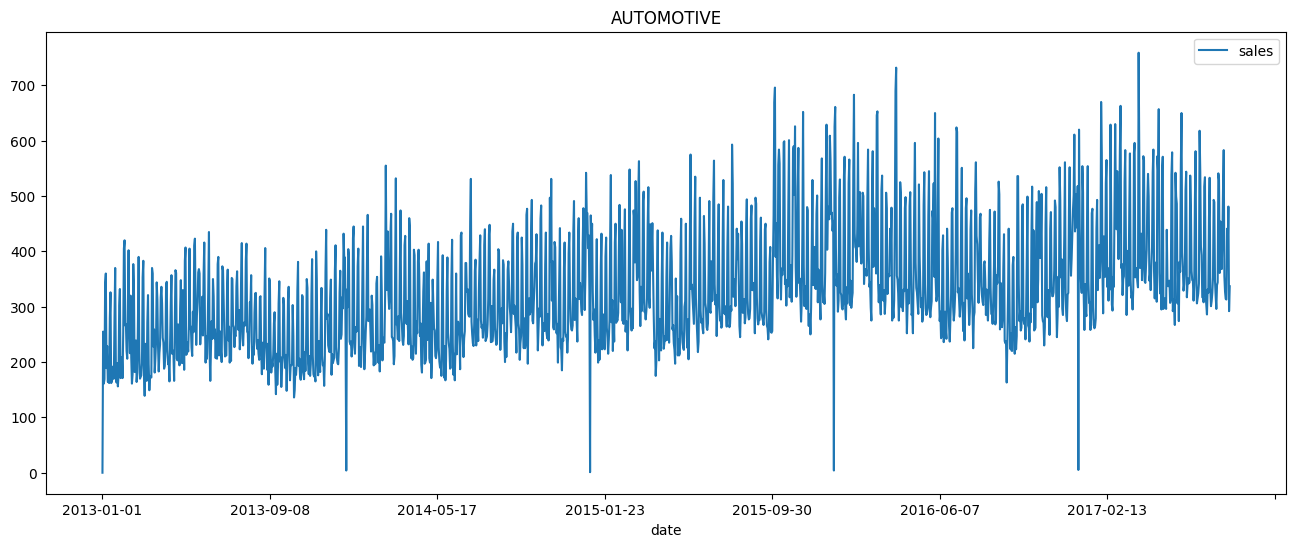

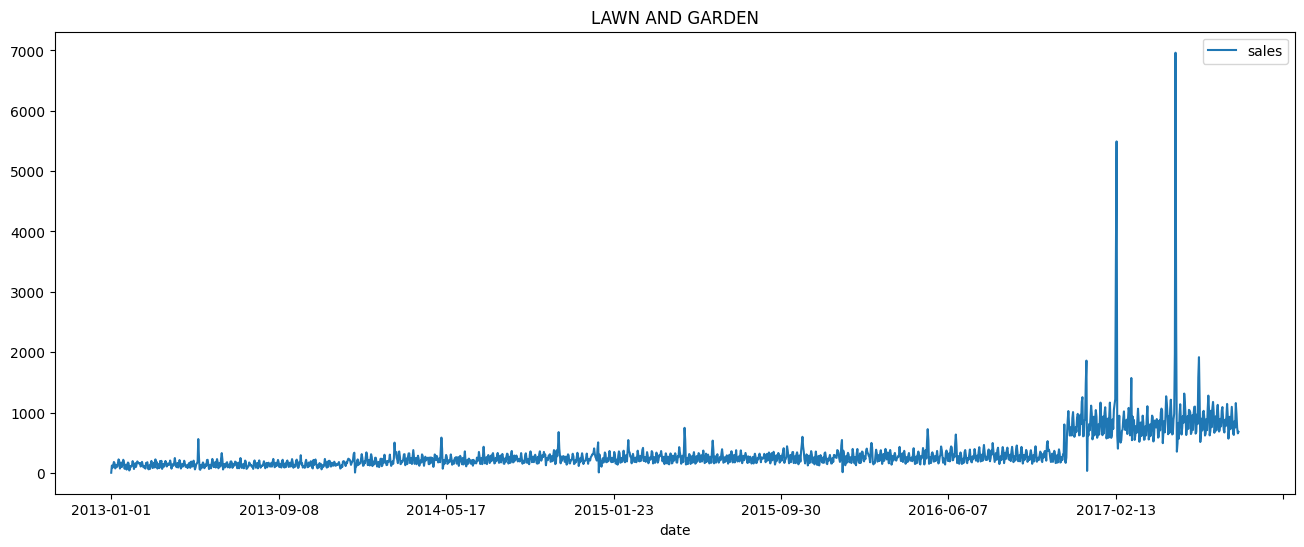

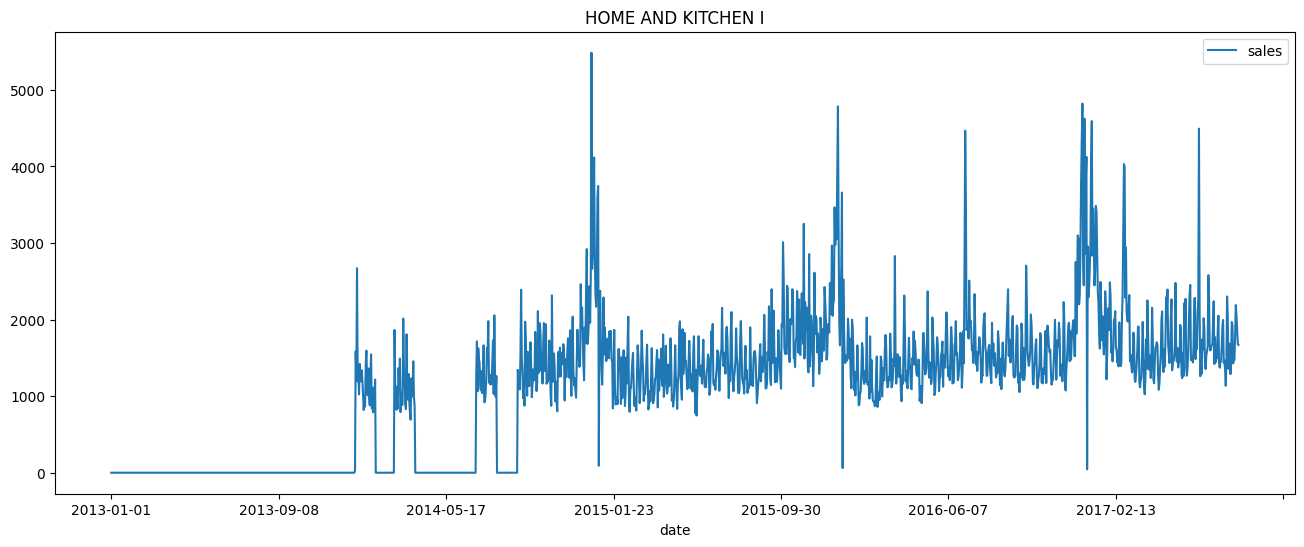

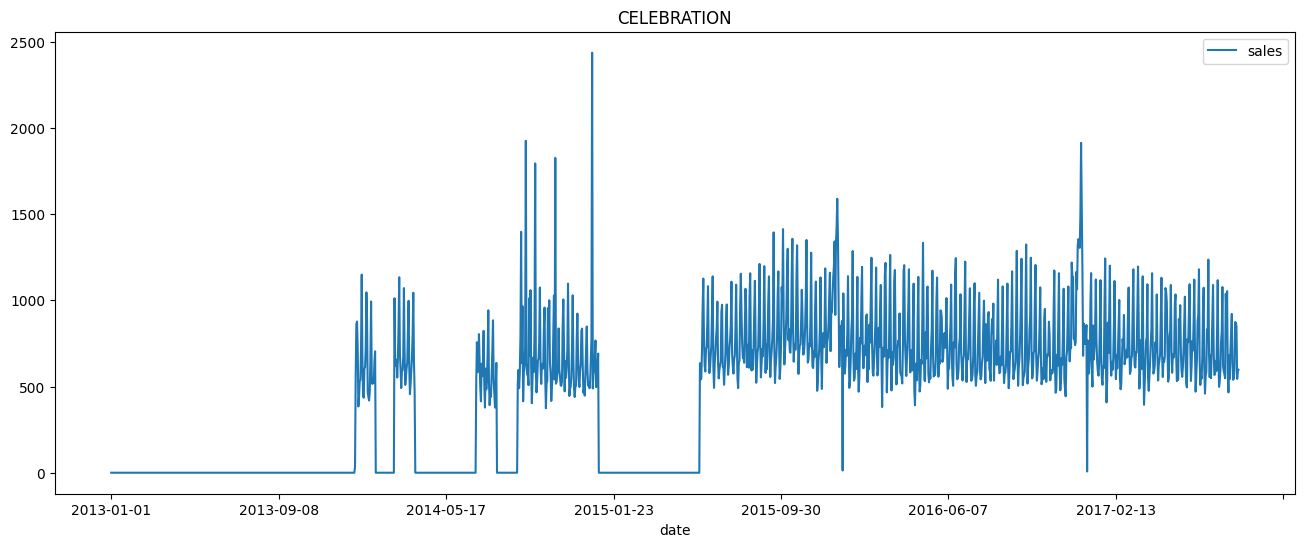

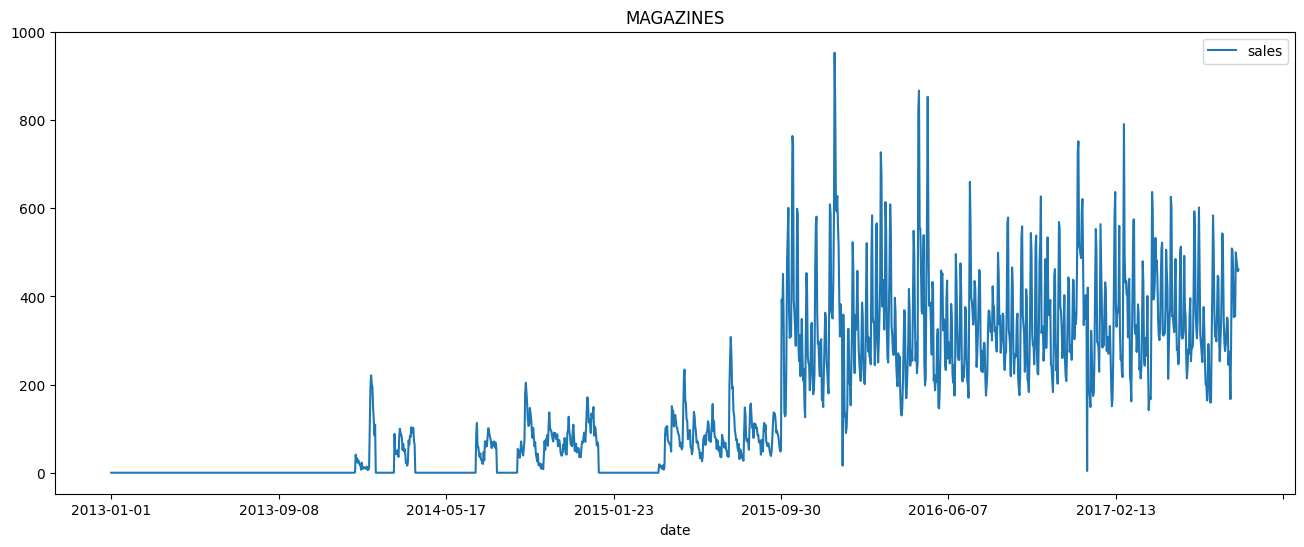

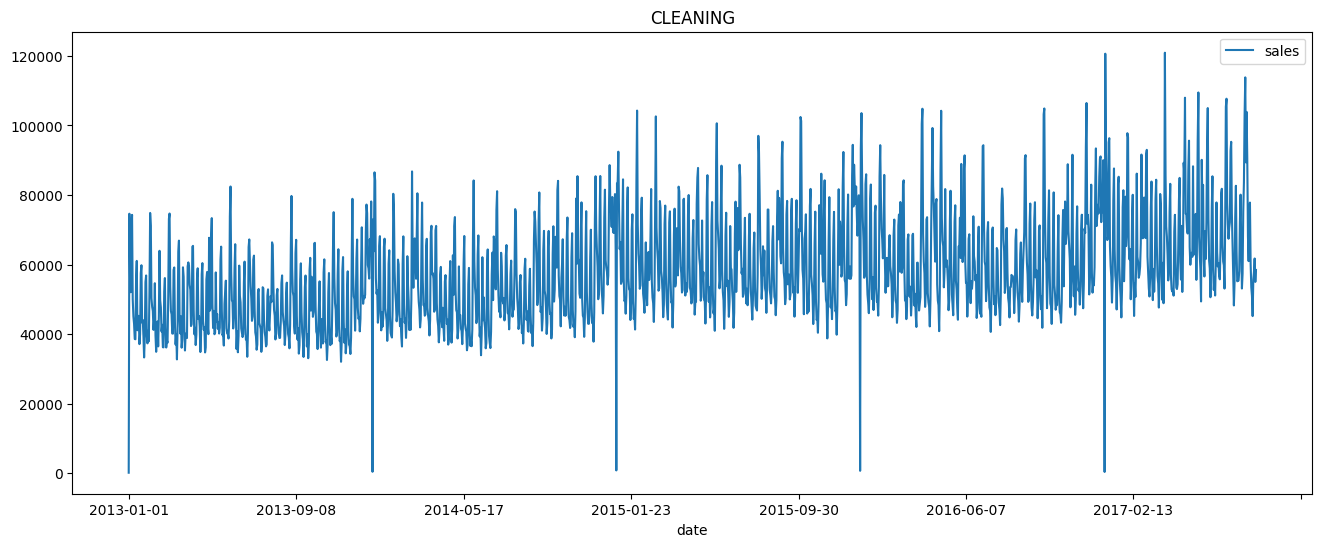

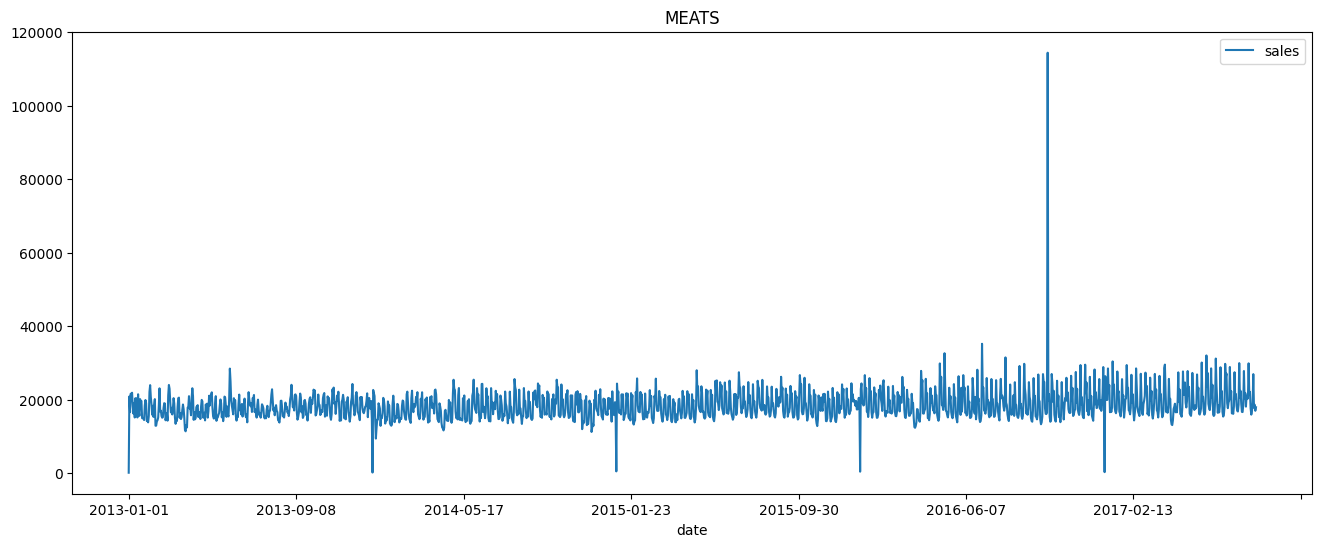

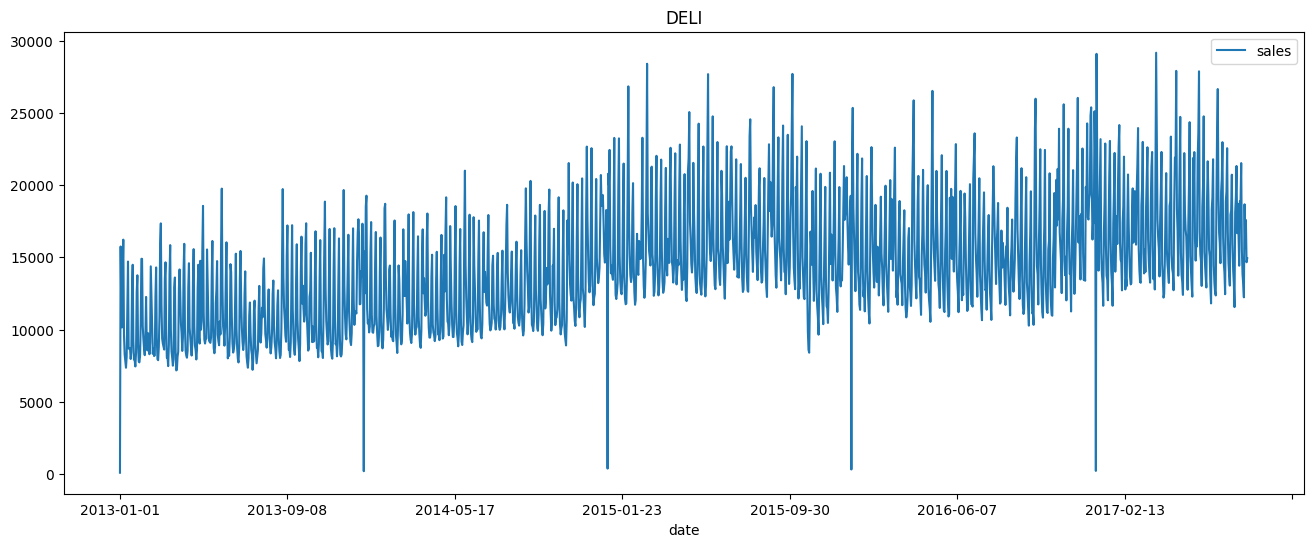

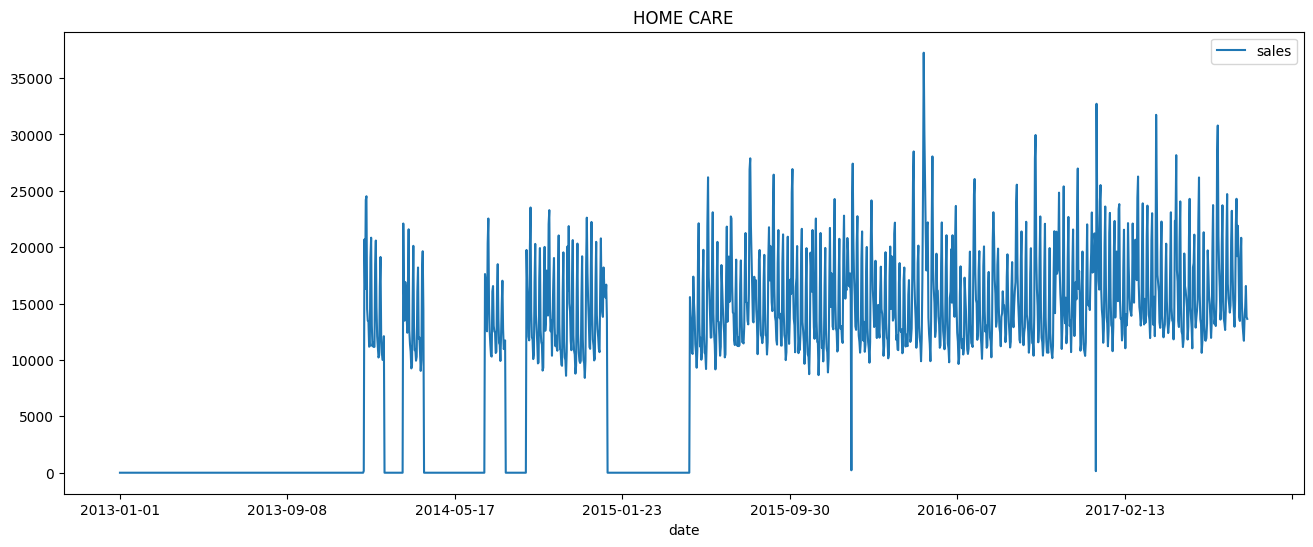

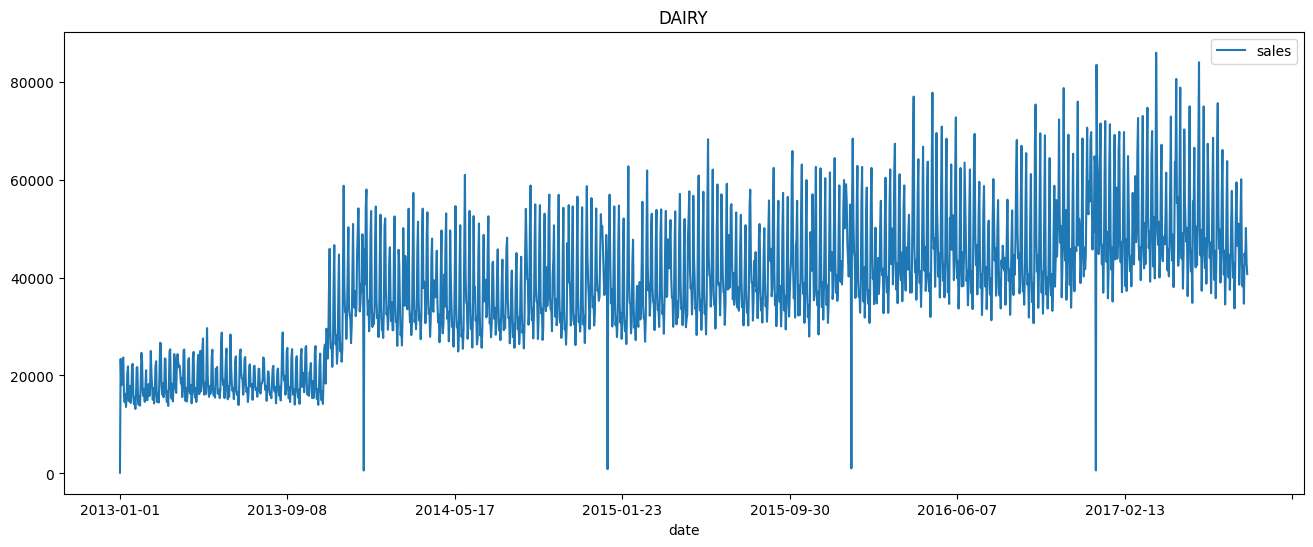

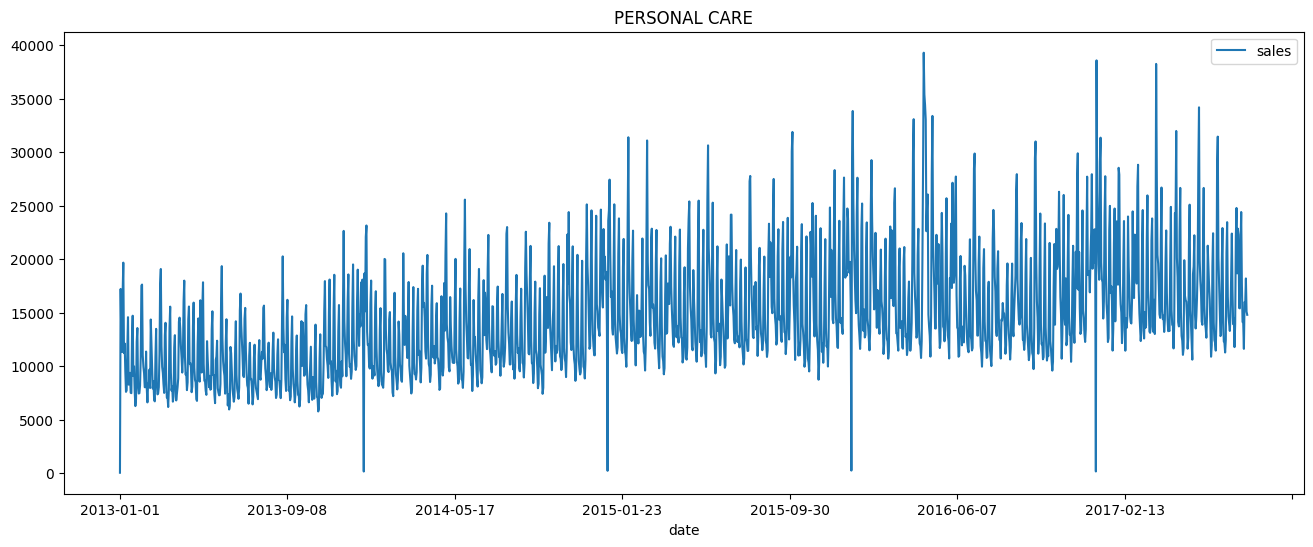

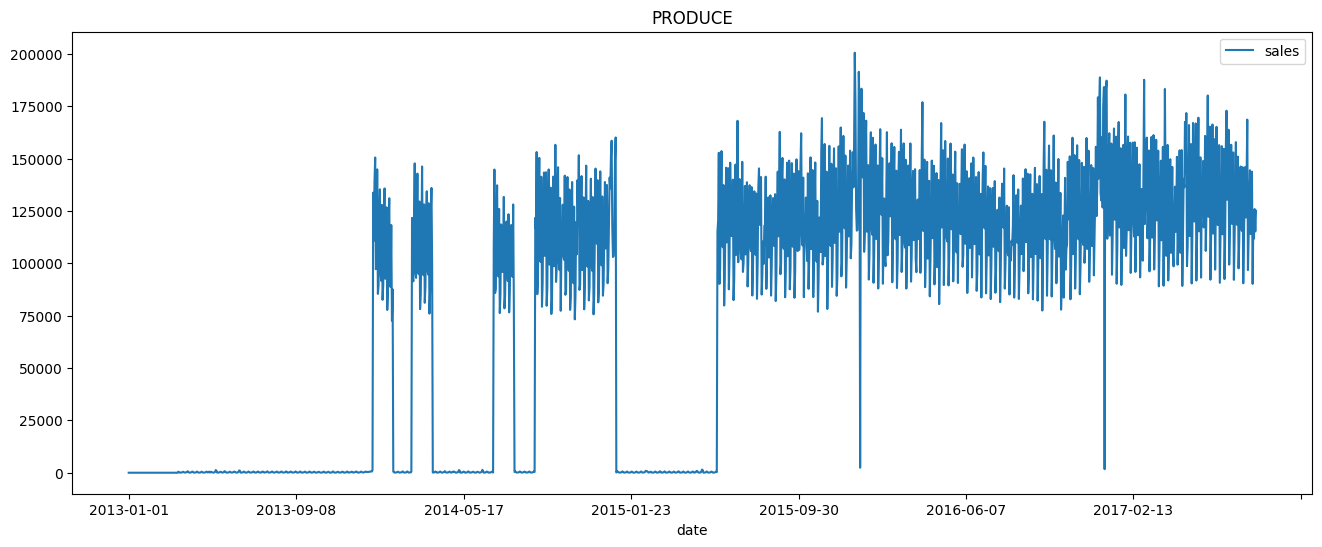

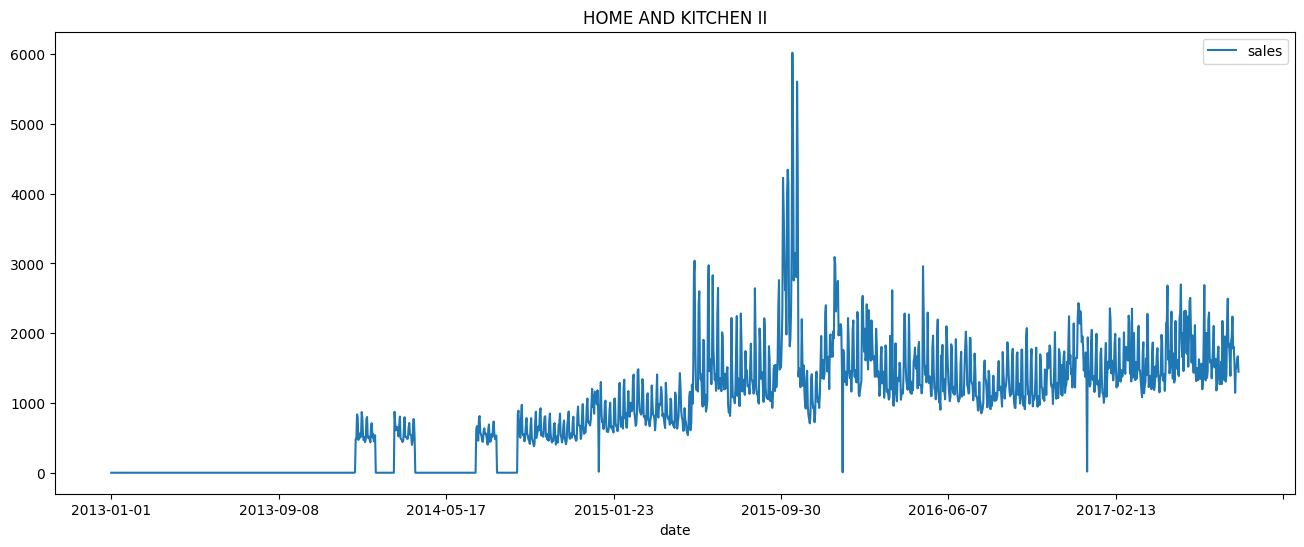

In [5]:
for i in set(train["family"]):
    df = train.loc[train["family"] == i]
    df[["date","sales"]].groupby("date").sum().plot(figsize = (16,6), title = i)

In [61]:
train.head()
train.set_index('date')

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
...                 ...  
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0  

[3000888 rows x 5 columns]

In [62]:
average_sales = train[["date","sales"]].groupby('date').mean()['sales']
average_sales.to_frame()

sales
date                  
2013-01-01    1.409438
2013-01-02  278.390807
2013-01-03  202.840197
2013-01-04  198.911154
2013-01-05  267.873244
...                ...
2017-08-11  463.733851
2017-08-12  444.798280
2017-08-13  485.768618
2017-08-14  427.004717
2017-08-15  427.980884

[1684 rows x 1 columns]

In [63]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

# YOUR CODE HERE: Create a time dummy
time = np.arange(len(average_sales.index))

df['time'] = time 

# YOUR CODE HERE: Create training data
X = df.loc[:,['time']]  # features
y = df.loc[:,"sales"]  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

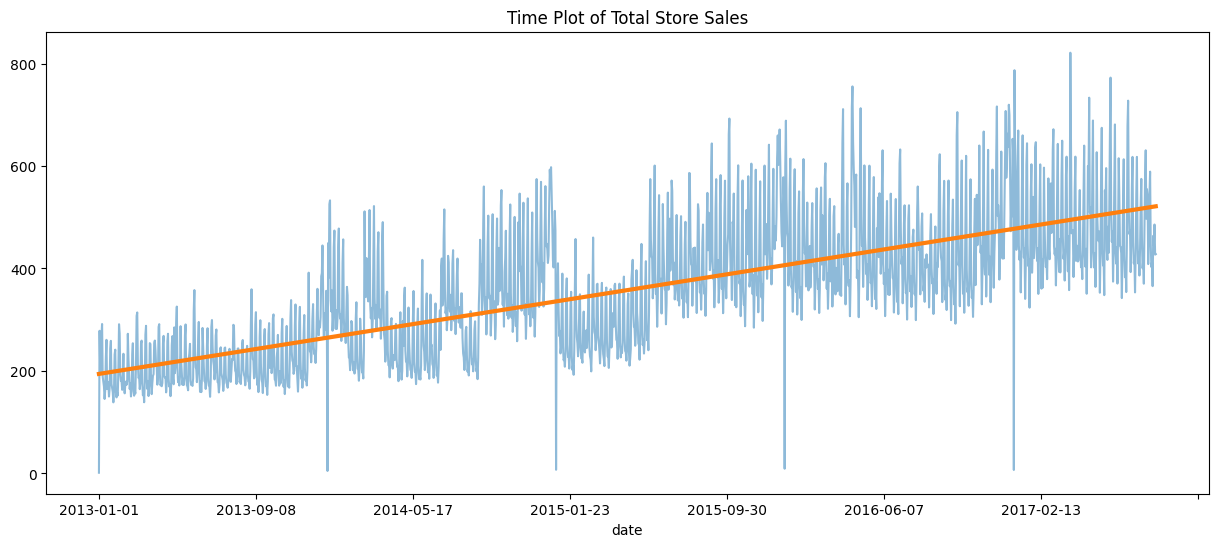

In [64]:
ax = y.plot(alpha=0.5, figsize = (15,6))
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

In [65]:
train[["date", "family", "sales"]].groupby(["date", "family"]).sum()

sales
date       family                                   
2013-01-01 AUTOMOTIVE                       0.000000
           BABY CARE                        0.000000
           BEAUTY                           2.000000
           BEVERAGES                      810.000000
           BOOKS                            0.000000
...                                              ...
2017-08-15 POULTRY                      17586.709986
           PREPARED FOODS                4641.522980
           PRODUCE                     125108.971000
           SCHOOL AND OFFICE SUPPLIES    2530.000000
           SEAFOOD                        970.177005

[55572 rows x 1 columns]

In [73]:
stores = pd.read_csv("Data/stores.csv")
train = pd.read_csv("Data/train.csv")
train = train.merge(stores, on = "store_nbr")
train.head()

id        date  store_nbr      family  sales  onpromotion   city  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1   1  2013-01-01          1   BABY CARE    0.0            0  Quito   
2   2  2013-01-01          1      BEAUTY    0.0            0  Quito   
3   3  2013-01-01          1   BEVERAGES    0.0            0  Quito   
4   4  2013-01-01          1       BOOKS    0.0            0  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13

In [99]:
categorical_features = ["family"]
transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = train[["family","onpromotion"]]
y = train.loc[:,"sales"]  # target
X = transformer.fit_transform(X)
print(X.shape, y.shape)
# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X))

(3000888, 34) (3000888,)


In [6]:
def lin_mod(train, test):
    categorical_features = ["family"]
    transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), categorical_features)], remainder='passthrough')
    X = train[["family","onpromotion"]]
    y = train.loc[:,"sales"]  # target
    X = transformer.fit_transform(X)
    print(X.shape, y.shape)
    # Train the model
    model = LinearRegression()
    model.fit(X, y)
    X_test = test[["family","onpromotion"]]
    X_test = transformer.fit_transform(X_test)
    y_pred = pd.Series(model.predict(X_test))
    return y_pred

In [7]:
y_pred = lin_mod(train,test)

(3000888, 34) (3000888,)


In [8]:
y_pred

0           5.107434
1           0.099574
2          38.705304
3        2575.247879
4           0.070856
            ...     
28507     322.379886
28508      88.973145
28509    1135.954842
28510     169.995399
28511      14.048630
Length: 28512, dtype: float64

In [120]:
submission = pd.DataFrame(test["id"])
submission ["sales"] = y_pred
submission.to_csv("submission.csv", index = False)

In [6]:
transactions = pd.read_csv("Data/transactions.csv")
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [9]:
store_trans = transactions.merge(stores, on = "store_nbr")
# store_trans[["store_nbr", "type"]].value_counts()
store_trans

date  store_nbr  transactions       city        state type  \
0      2013-01-01         25           770    Salinas  Santa Elena    D   
1      2013-01-02          1          2111      Quito    Pichincha    D   
2      2013-01-02          2          2358      Quito    Pichincha    D   
3      2013-01-02          3          3487      Quito    Pichincha    D   
4      2013-01-02          4          1922      Quito    Pichincha    D   
...           ...        ...           ...        ...          ...  ...   
83483  2017-08-15         50          2804     Ambato   Tungurahua    A   
83484  2017-08-15         51          1573  Guayaquil       Guayas    A   
83485  2017-08-15         52          2255      Manta       Manabi    A   
83486  2017-08-15         53           932      Manta       Manabi    D   
83487  2017-08-15         54           802  El Carmen       Manabi    C   

       cluster  
0            1  
1           13  
2           13  
3            8  
4            9  
...        ...  
83483       14  
83484       17  
83485       11  
83486       13  
83487        3  

[83488 rows x 7 columns]

In [8]:
train.merge(transactions, on = ["date", "store_nbr"])

id        date  store_nbr                      family     sales  \
0            561  2013-01-01         25                  AUTOMOTIVE     0.000   
1            562  2013-01-01         25                   BABY CARE     0.000   
2            563  2013-01-01         25                      BEAUTY     2.000   
3            564  2013-01-01         25                   BEVERAGES   810.000   
4            565  2013-01-01         25                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
2755099  3000883  2017-08-15          9                     POULTRY   438.133   
2755100  3000884  2017-08-15          9              PREPARED FOODS   154.553   
2755101  3000885  2017-08-15          9                     PRODUCE  2419.729   
2755102  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2755103  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion     city        state type  cluster  transactions  
0                  0  Salinas  Santa Elena    D        1           770  
1                  0  Salinas  Santa Elena    D        1           770  
2                  0  Salinas  Santa Elena    D        1           770  
3                  0  Salinas  Santa Elena    D        1           770  
4                  0  Salinas  Santa Elena    D        1           770  
...              ...      ...          ...  ...      ...           ...  
2755099            0    Quito    Pichincha    B        6          2155  
2755100            1    Quito    Pichincha    B        6          2155  
2755101          148    Quito    Pichincha    B        6          2155  
2755102            8    Quito    Pichincha    B        6          2155  
2755103            0    Quito    Pichincha    B        6          2155  

[2755104 rows x 11 columns]